# Assignment is below. 

In [134]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


from sklearn.linear_model import LogisticRegression as Model

Read in the Kobe Bryant shooting data [https://www.kaggle.com/c/kobe-bryant-shot-selection]

In [135]:
kobe = pd.read_csv('../data/kobe.csv')
kobe.dropna(inplace=True)

In [136]:
list(kobe.columns)

['action_type',
 'combined_shot_type',
 'game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'season',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'shot_type',
 'shot_zone_area',
 'shot_zone_basic',
 'shot_zone_range',
 'team_id',
 'team_name',
 'game_date',
 'matchup',
 'opponent',
 'shot_id']

For now, use just the numerical datatypes. They are below as `num_columns`

In [137]:
kobe.shot_zone_area.value_counts()

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64

In [138]:
kobe.shot_zone_range.value_counts()

Less Than 8 ft.    7857
16-24 ft.          6907
8-16 ft.           5580
24+ ft.            5281
Back Court Shot      72
Name: shot_zone_range, dtype: int64

In [139]:
kobe.shot_zone_basic.value_counts()

Mid-Range                10532
Restricted Area           5932
Above the Break 3         4720
In The Paint (Non-RA)     3880
Right Corner 3             333
Left Corner 3              240
Backcourt                   60
Name: shot_zone_basic, dtype: int64

In [140]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [141]:
kobe.shot_made_flag.value_counts(normalize=True)

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

In [142]:
kobe.shot_made_flag.value_counts(normalize=False)

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

In [143]:
num_columns = [col for col, dtype in zip(kobe.columns, kobe.dtypes) if dtype != 'object']
num_columns

['game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'team_id',
 'shot_id']

## The `shot_made_flag` is the result (0 or 1) of the shot that Kobe took. Some of the values are missing (e.g. `NaN`) but we *_dropped_* them.

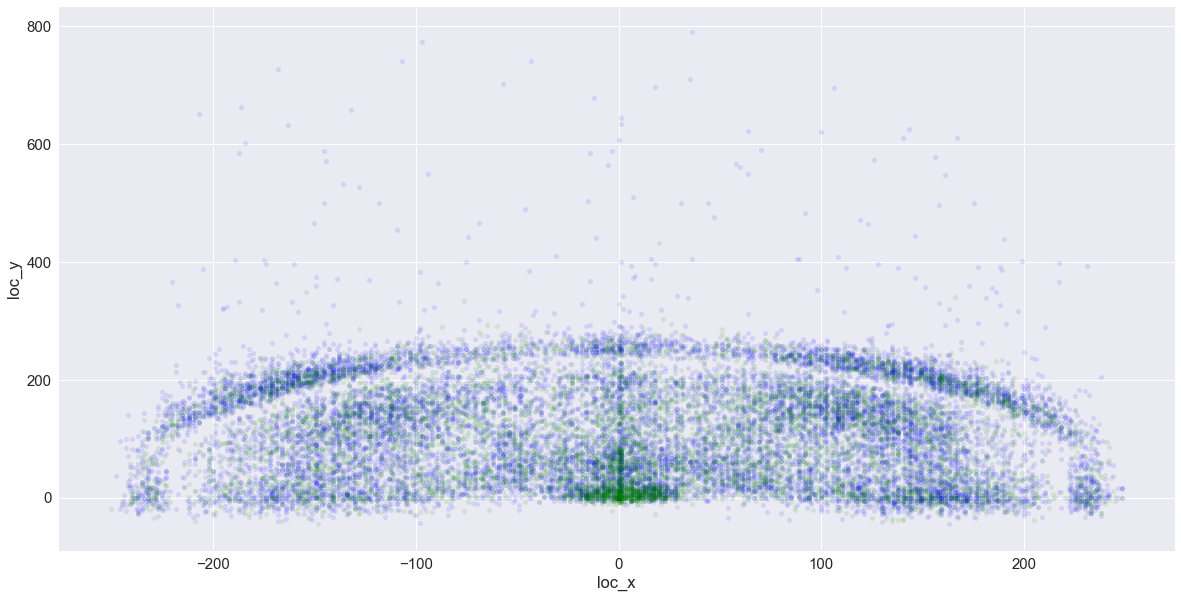

In [144]:
fig, ax = plt.subplots()
kobe[kobe.shot_made_flag==0].plot(kind='scatter', x='loc_x', y='loc_y', color='blue', alpha=0.1, ax=ax)
kobe[kobe.shot_made_flag==1].plot(kind='scatter', x='loc_x', y='loc_y', color='green', alpha=0.1, ax=ax)
# plt.scatter(kobe.loc_x, kobe.loc_y, alpha=0.2)

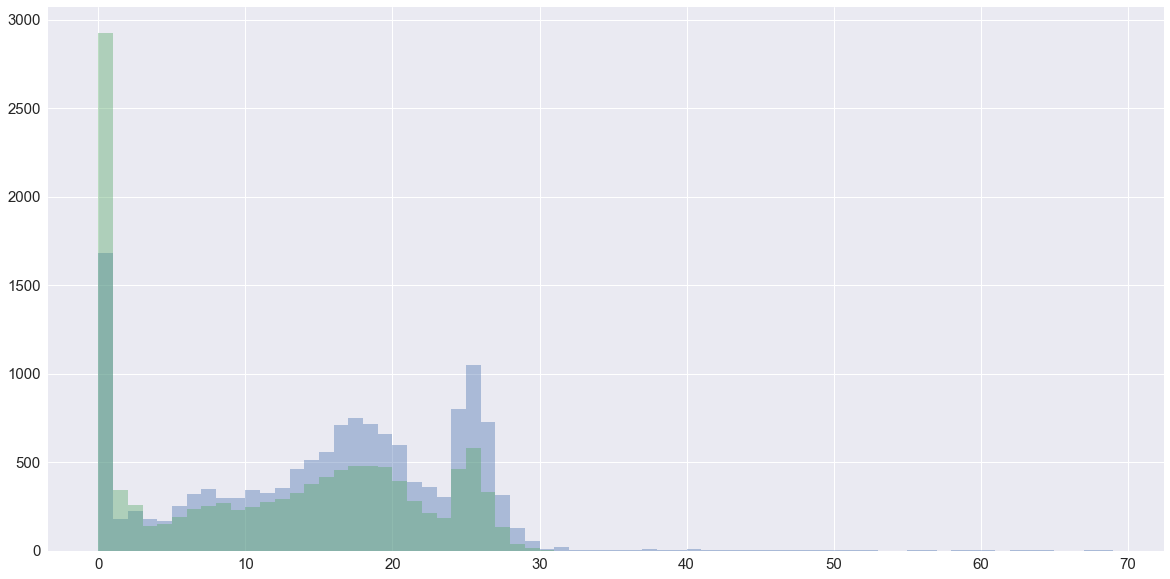

In [145]:
kobe[kobe.shot_made_flag==0].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[kobe.shot_made_flag==1].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

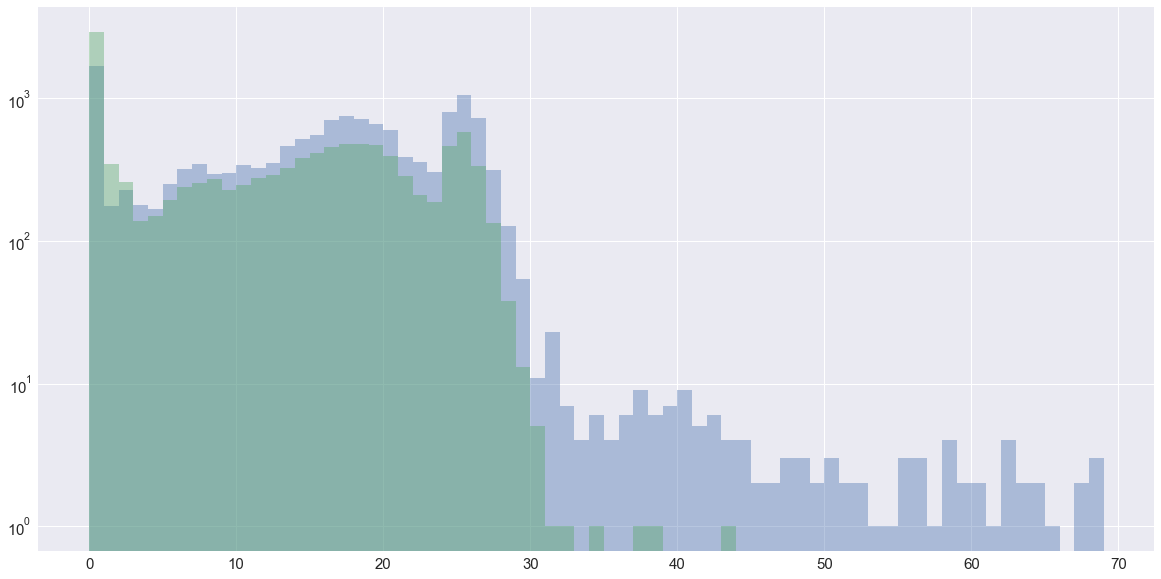

In [146]:
kobe[kobe.shot_made_flag==0].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4, log=True)
kobe[kobe.shot_made_flag==1].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4, log=True)

In [147]:
# fit a linear regression model and store the predictions
feature_cols = ['shot_distance', 'minutes_remaining']
X = kobe[feature_cols]
y = kobe.shot_made_flag

model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())


0.59719033350196526

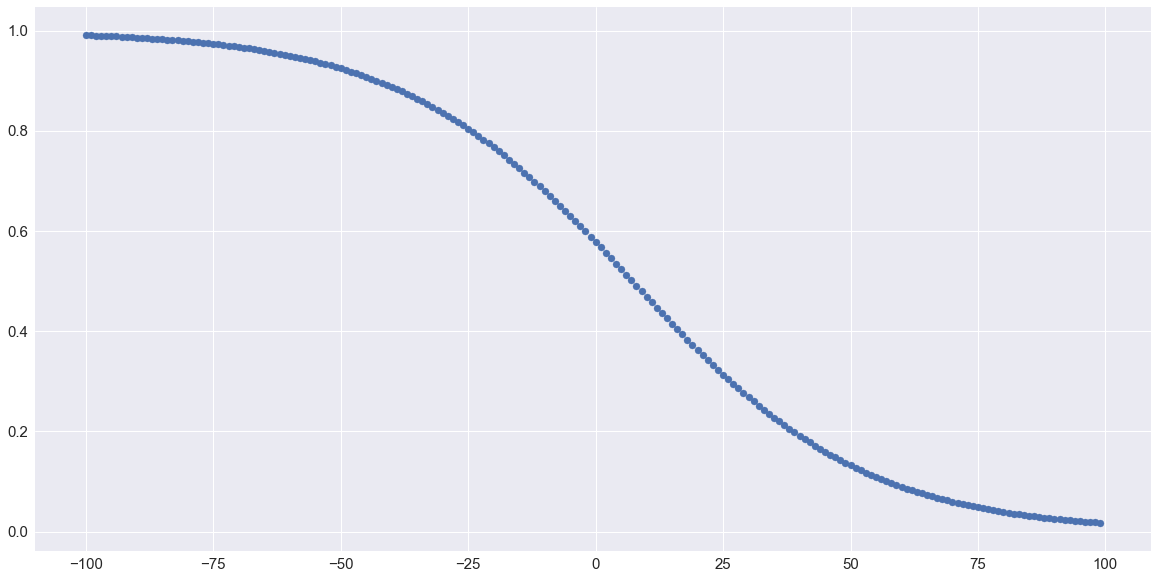

In [148]:
distances = np.arange(-100, 100)
minutes = np.array([0]*200)
x_trial = np.column_stack((distances, minutes))
model.predict_proba(x_trial)
plt.scatter(distances, model.predict_proba(x_trial)[:,1])

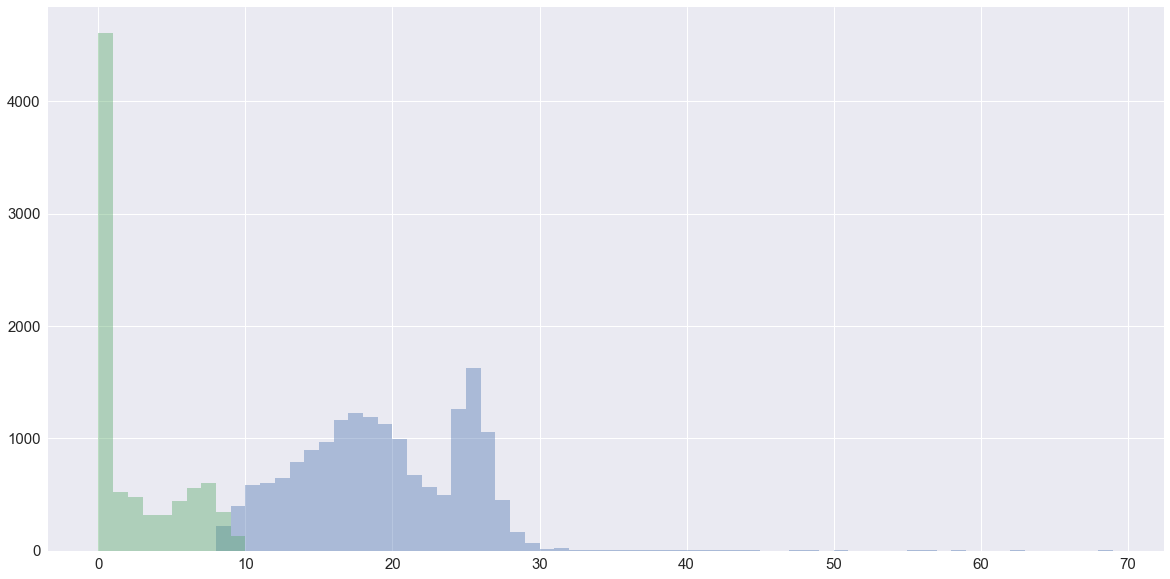

In [149]:
kobe[(kobe.pred==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

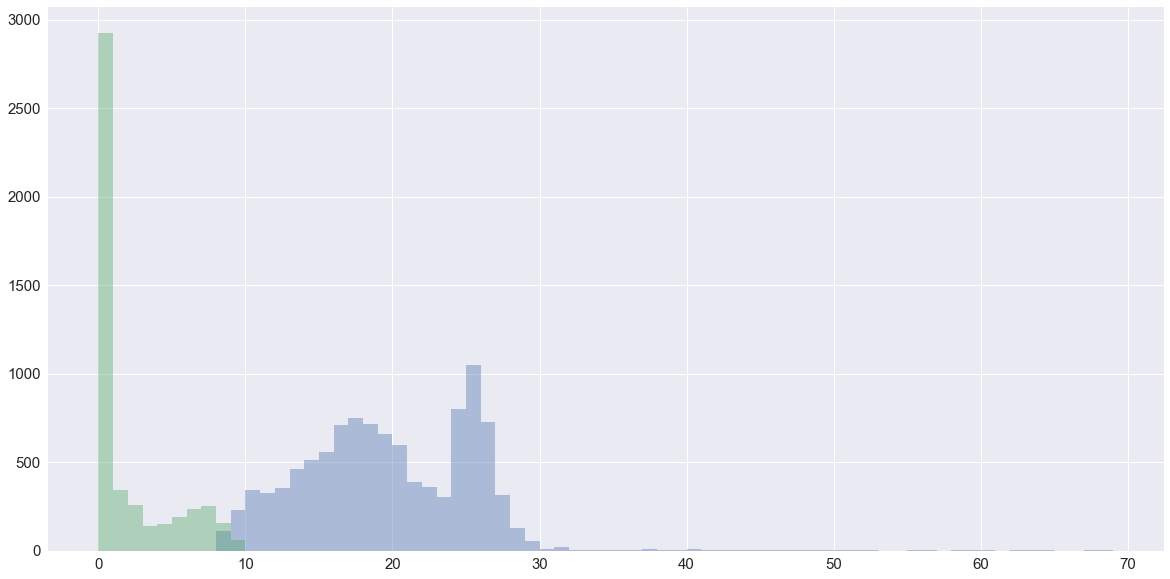

In [150]:
kobe[(kobe.pred==0) & (kobe.shot_made_flag==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1) & (kobe.shot_made_flag==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

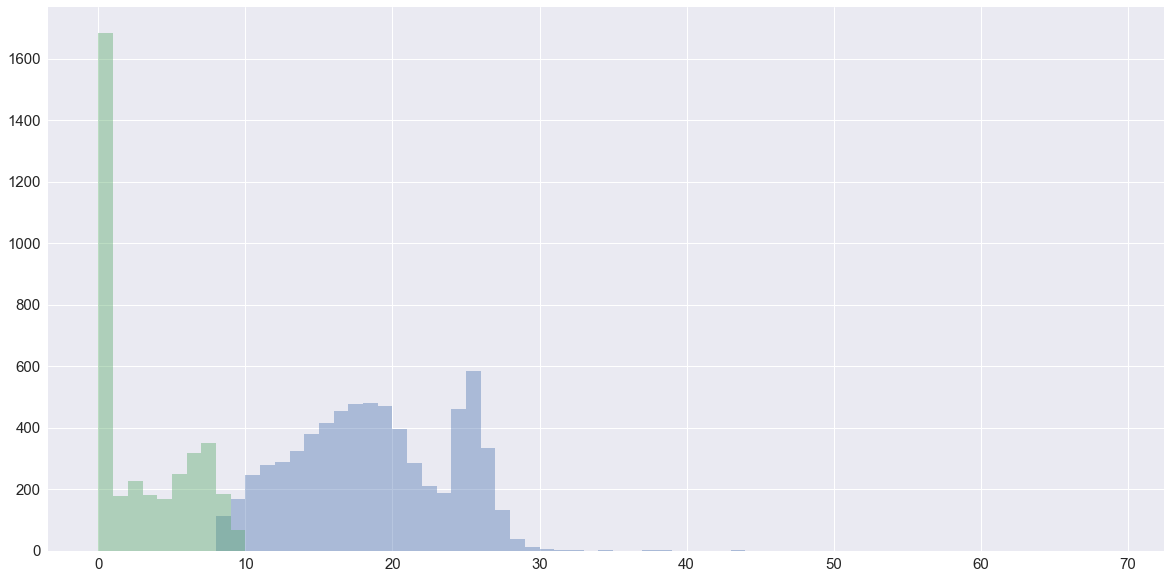

In [151]:
kobe[(kobe.pred==0) & (kobe.shot_made_flag==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1) & (kobe.shot_made_flag==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

Text(0,0.5,'made')

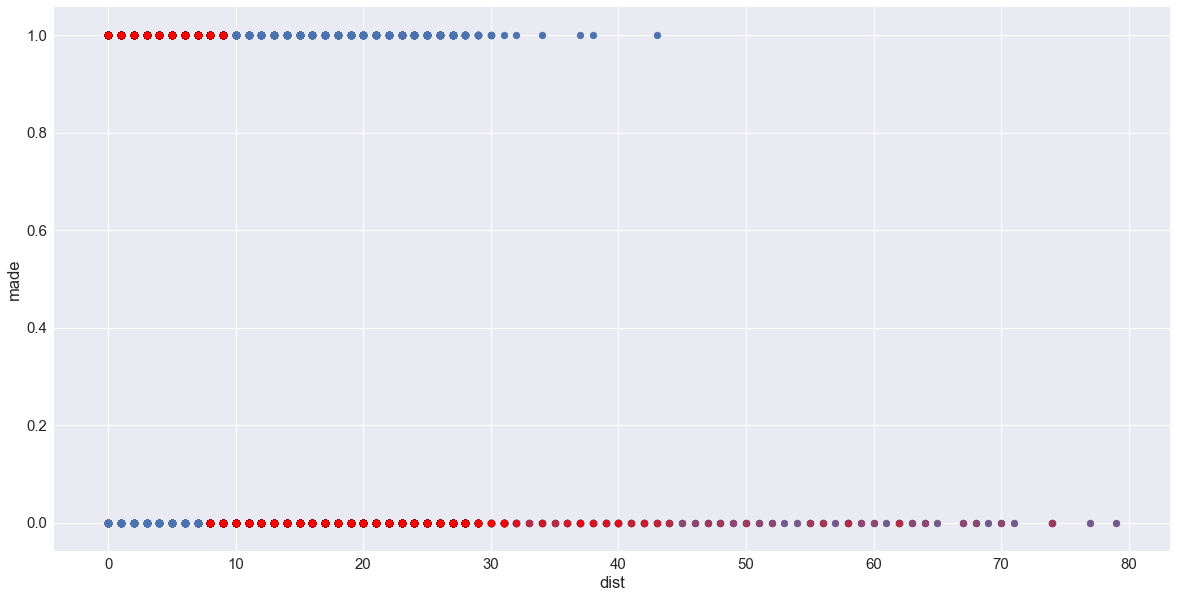

In [152]:
# scatter plot that includes the regression line
plt.scatter(kobe.shot_distance, kobe.shot_made_flag)
plt.scatter(kobe.shot_distance, kobe.pred, color='red', alpha=.2)
plt.xlabel('dist')
plt.ylabel('made')

## The following is a reminder of how the SciKit-Learn Models can be interfaced

In [153]:
from sklearn.linear_model import LogisticRegression as Model
# from sklearn.tree import DecisionTreeClassifier as Model
# from sklearn.ensemble import RandomForestClassifier as Model
model = Model()

from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )
from sklearn.metrics import *
from sklearn import cross_validation
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.4, random_state=0)

cross_validation.cross_val_score(model, X, y, cv=10)


array([ 0.59237651,  0.59354337,  0.59299611,  0.59688716,  0.61750973,
        0.58388478,  0.60334761,  0.60918645,  0.60140132,  0.58388478])

# Assignment

### Warmup. Perform some analysis on Kobe's shot selection. Ask and answer (with charts) questions such as: Does Kobe make more shots in the 4th quarter than on average? Does Kobe make more shots from the left more than the right? What was Kobe's best year for shooting percentage? Etc. The more naunced the more you'll have a feel for the data.

### 1. Create a new column called `abs_x` that is equal to the absolute value of loc_x. Plot a histogram of made shots and missed shots using this variable. Explain in detail (with graphics and evidence) why this could be a better feature/column to use in a Logsitic Regression model instead of `loc_x`.

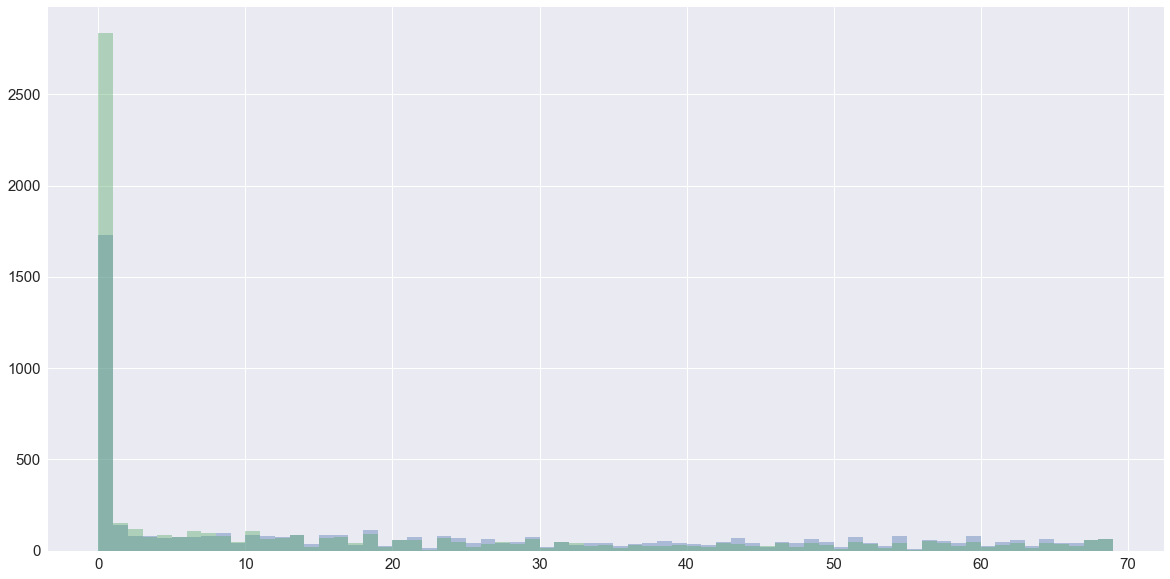

In [154]:
kobe['abs_x'] = kobe['loc_x'].abs()
kobe[kobe.shot_made_flag==0].abs_x.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[kobe.shot_made_flag==1].abs_x.hist(bins=np.arange(0,70,1), alpha=.4)

In [155]:
X = kobe.abs_x.reshape(-1, 1)
y = kobe.shot_made_flag

model = Model().fit(X, y)
kobe['pred'] = model.predict(X)

accuracy_score(kobe.shot_made_flag, kobe.pred.round())

/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


0.5925983577849554

In [156]:
X = kobe.loc_x.reshape(-1, 1)
y = kobe.shot_made_flag

model = Model().fit(X, y)
kobe['pred'] = model.predict(X)

accuracy_score(kobe.shot_made_flag, kobe.pred.round())

/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


0.55383896952951706

Using abs_x produced a better accuracy score than loc_x.

### 2.  Convert several (including ` ` ) string columns/features into numerical and attempt to use them in fitting a Logistic Regression model. Show histograms (similar to ones above) of made/missed of these new numerical features. Use these histograms to explain and justify why these features could improve the model

In [157]:
kobe.shot_zone_range = pd.Categorical(kobe.shot_zone_range)
kobe['sz_range'] = kobe.shot_zone_range.astype('category').cat.codes

1. 16-24 ft.       = 0
2. 24+ ft.         = 1 
3. 8-16 ft.        = 2 
4. Back Court Shot = 3 
5. Less Than 8 ft. = 4

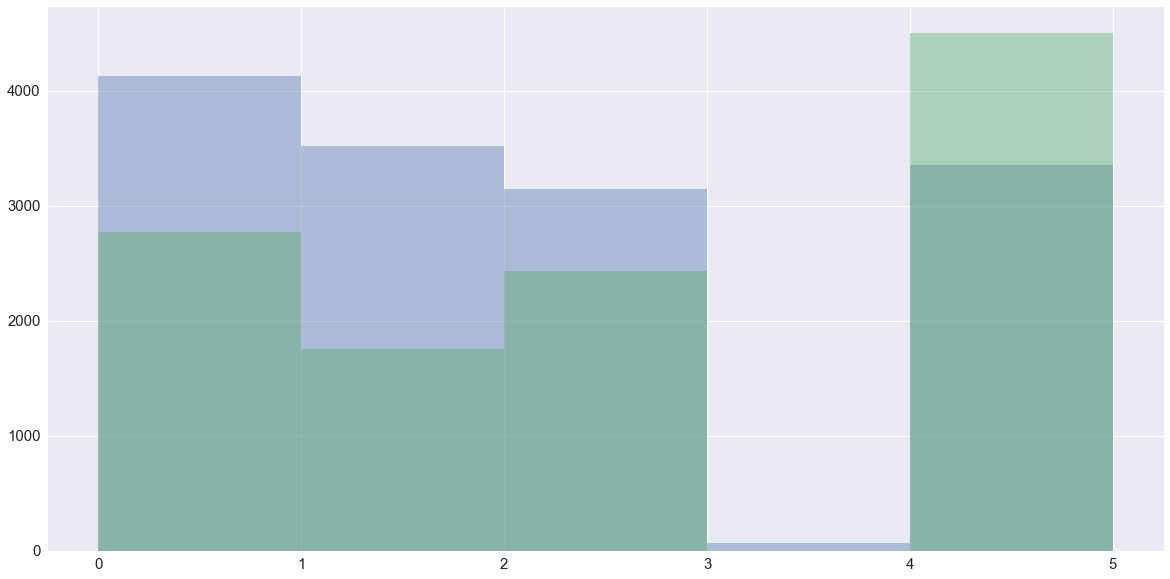

In [158]:
kobe[kobe.shot_made_flag==0].sz_range.hist(bins=np.arange(0,6,1), alpha=.4)
kobe[kobe.shot_made_flag==1].sz_range.hist(bins=np.arange(0,6,1), alpha=.4)

The shot zone range feature would improve the model because it has a good distribution of data as shown in the histogram above.

In [159]:
kobe.shot_zone_area = pd.Categorical(kobe.shot_zone_area)
kobe['sz_area'] = kobe.shot_zone_area.astype('category').cat.codes

1. Back Court(BC)     =      0
2. Center(C)          =      1
3. Left Side Center(LC) =    2 
4. Left Side(L)         =   3 
5. Right Side Center(RC) =   4 
6. Right Side(R)          =  5 

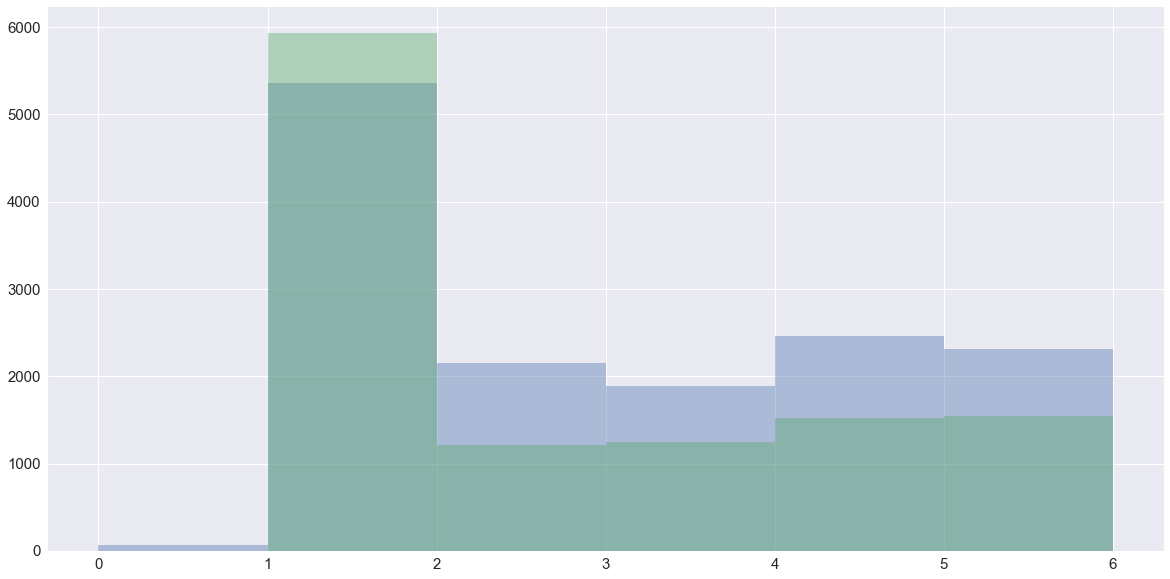

In [160]:
kobe[kobe.shot_made_flag==0].sz_area.hist(bins=np.arange(0,7,1), alpha=.4)
kobe[kobe.shot_made_flag==1].sz_area.hist(bins=np.arange(0,7,1), alpha=.4)

The shot zone area feature would also improve the model because it has a good distribution of data as shown in the histogram above.

### 3. Show a 3 dimensional surface plot [https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots] of probabilities from a trained Logistic Regression model using only `abs_x` and `loc_y`. The probabilities arise from a distributed grid of `x` values and `y` values as input to the `predict_proba()` function.

In [161]:
X = kobe[['abs_x', 'loc_y']]
y = kobe.shot_made_flag

model = Model().fit(X, y)
kobe['pred'] = model.predict(X)

accuracy_score(kobe.shot_made_flag, kobe.pred.round())

0.59773514418025453

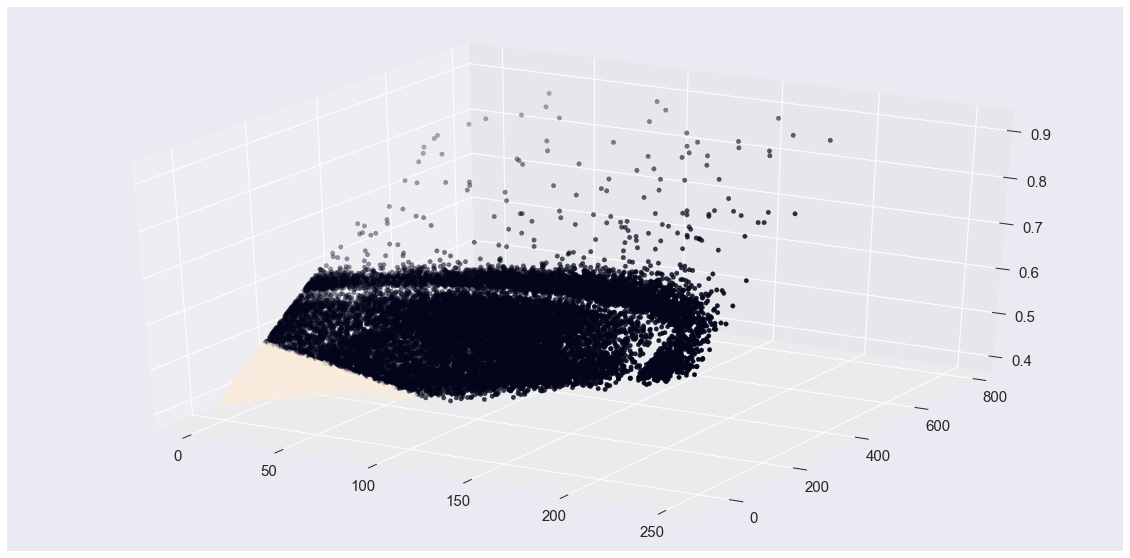

In [162]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

np.meshgrid(X.abs_x, X.loc_y)

# Plot the surface
ax.scatter(X.abs_x , X.loc_y, model.predict_proba(X)[:,0].flatten(), c=model.predict(X))

plt.show()